**Customer Segmentation with K-Means Clustering**

Customer segmentation is a technique used by businesses to divide their customer base into distinct groups based on various characteristics such as demographics, purchasing behavior, or psychographics. K-Means clustering is one of the most popular unsupervised machine learning algorithms for customer segmentation.

**Importing libraries**

In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
url = "/content/mall.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

print(df.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


**Data Preprocessing**

In [22]:
# prompt: do preprocessing for the above dataset

# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any) - You can choose to impute or remove them.
# For example, if 'Annual Income (k$)' has missing values:
# df['Annual Income (k$)'].fillna(df['Annual Income (k$)'].mean(), inplace=True)

# Convert categorical variables to numerical using one-hot encoding (if needed)
# This dataset doesn't seem to have categorical variables.

# Feature scaling - It's generally a good idea to scale features before applying K-Means.
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # Select relevant features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now, X_scaled contains the scaled data that you can use for clustering.


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Elbow Method for Optimal Number of Clusters**

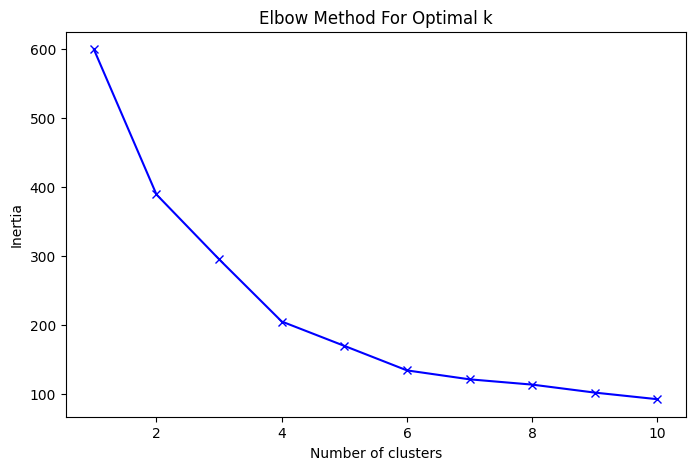

In [26]:
# Import the necessary library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Using the Elbow Method to determine the optimal number of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


**Apply K-Means Clustering**

In [28]:
# Assuming from the Elbow Method we found 5 clusters to be optimal
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Print first few rows with the new cluster column
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        3
3  Female   23                  16                      77        2
4  Female   31                  17                      40        2


** Visualization of the Clusters**

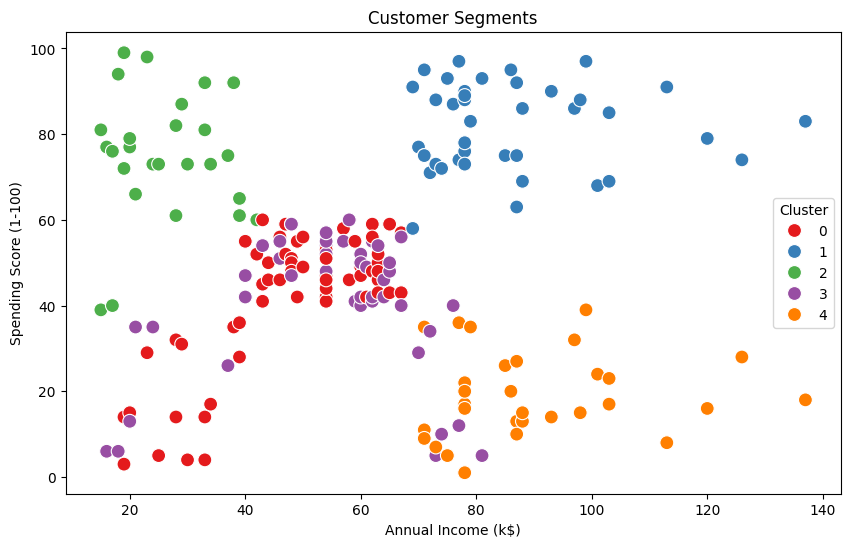

In [29]:
import seaborn as sns

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='Set1', s=100)
plt.title('Customer Segments')
plt.show()


**Evaluate the Clustering Performance (Silhouette Score)**

In [31]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.40846873777345605


**Analyze Each Cluster**

In [33]:
# Analyze each cluster by calculating the mean values for each group
# Exclude the 'Gender' column which contains non-numeric data
cluster_analysis = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
    # Add other numeric columns if needed
})

# Print cluster analysis
print(cluster_analysis)


               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871


**Bar Chart**

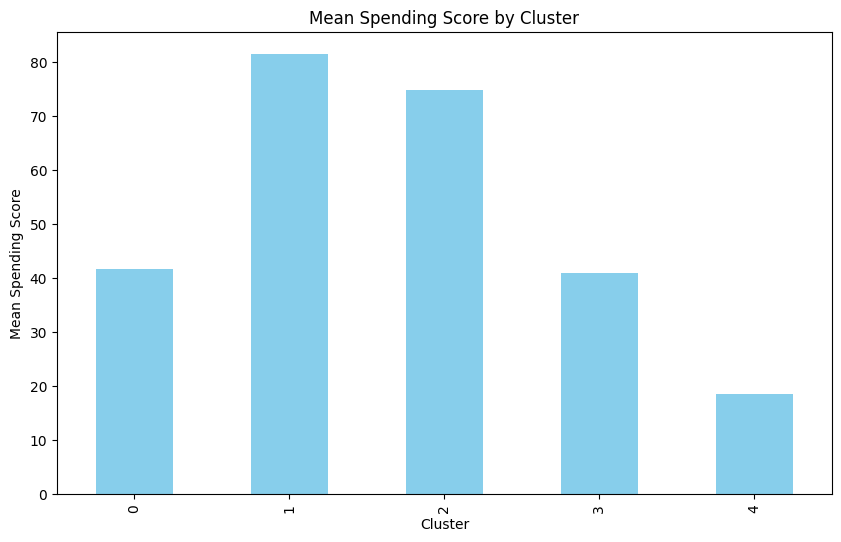

In [40]:
# Bar plot for cluster-wise mean spending score
plt.figure(figsize=(10, 6))
cluster_analysis['Spending Score (1-100)'].plot(kind='bar', color='skyblue')
plt.title('Mean Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Spending Score')
plt.show()


**Evaluate the Quality of the Clusters**

In [42]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.40846873777345605
